# Trabajo Práctico 3
## Visión por computadora
### Universidad de Buenos Aires

---
**Alumnas**: 
- Espínola, Carla
- Gambarte, Antonella Nerea

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

### 1. Obtener una detección del logo en cada imagen sin falsos positivos

In [15]:
template = cv2.imread('./template/pattern.png', 0)
w, h = template.shape[::-1]

image_paths = glob.glob('./images/*.png')

In [59]:
def detectar_logo_multiescala(imagen_path, template, threshold=0.8, escalas=np.linspace(0.5, 1.5, 10)):
    img_rgb = cv2.imread(imagen_path)
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    mejor_conf = -1
    mejor_top_left = None
    mejor_w, mejor_h = 0, 0
    for escala in escalas:
        temp_resized = cv2.resize(template, (int(template.shape[1]*escala), int(template.shape[0]*escala)))
        if temp_resized.shape[0] > img_gray.shape[0] or temp_resized.shape[1] > img_gray.shape[1]:
            continue
        #res = cv2.matchTemplate(img_gray, temp_resized, cv2.TM_CCOEFF_NORMED)
        res = cv2.matchTemplate(img_gray, temp_resized, cv2.TM_CCORR_NORMED)
        #res = cv2.matchTemplate(img_gray, temp_resized, cv2.TM_SQDIFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        if max_val > mejor_conf:
            mejor_conf = max_val
            mejor_top_left = max_loc
            mejor_w, mejor_h = temp_resized.shape[1], temp_resized.shape[0]
    if mejor_conf >= threshold:
        bottom_right = (mejor_top_left[0] + mejor_w, mejor_top_left[1] + mejor_h)
        cv2.rectangle(img_rgb, mejor_top_left, bottom_right, (0,255,0), 2)
        plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
        plt.title(f'Confianza: {mejor_conf:.2f}')
        plt.axis('off')
        plt.show()
    else:
        print(f"No se detectó logo en {imagen_path}")

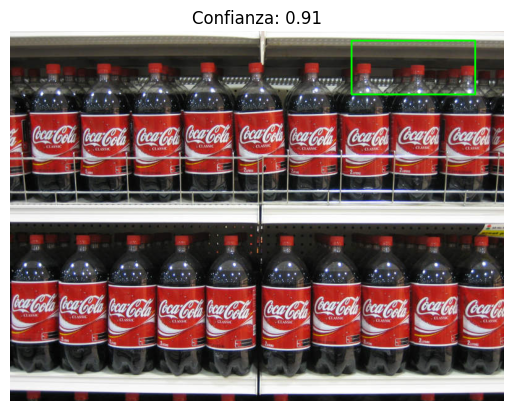

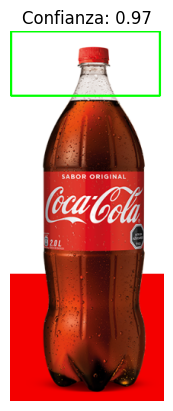

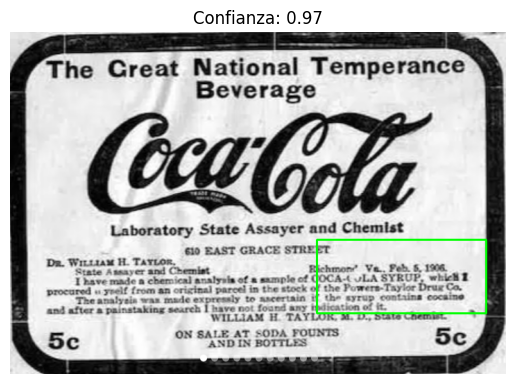

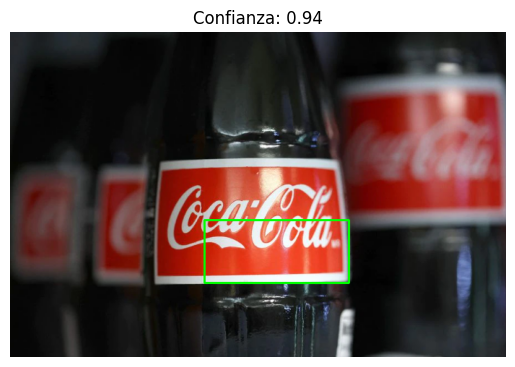

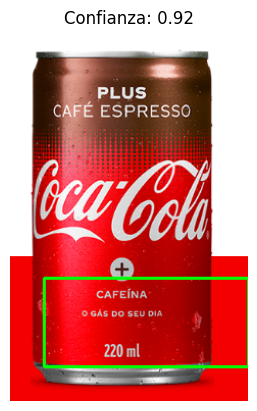

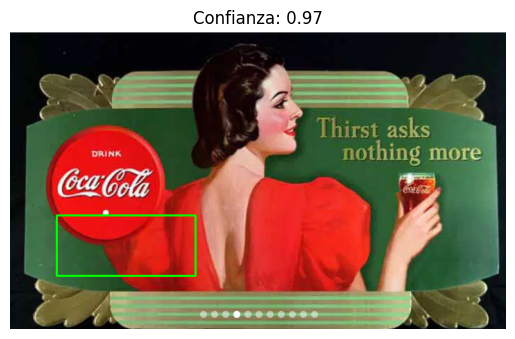

In [60]:
for img_path in image_paths:
    detectar_logo_multiescala(img_path, template, threshold=0.1)

### 2. Plantear y validar un algoritmo para múltiples detecciones en la imagen coca_multi.png con el mismo témplate del ítem 1

In [61]:
def detectar_multiples(imagen_path, template, threshold=0.8):
    img_rgb = cv2.imread(imagen_path)
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
    loc = np.where(res >= threshold)
    img_out = img_rgb.copy()
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_out, pt, (pt[0] + w, pt[1] + h), (255,0,0), 2)
        cv2.putText(img_out, f'{res[pt[1], pt[0]]:.2f}', (pt[0], pt[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1)
    plt.imshow(cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB))
    plt.title('Detecciones múltiples')
    plt.axis('off')
    plt.show()

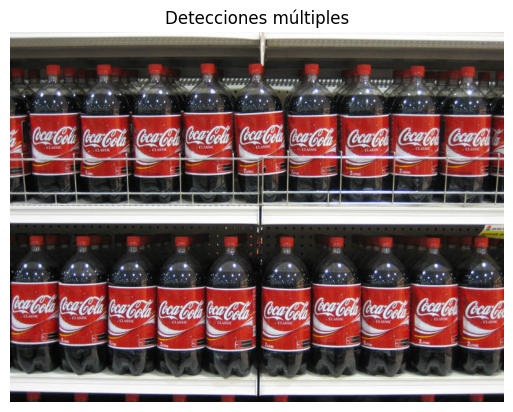

In [62]:
detectar_multiples('./images/coca_multi.png', template)

### 3. Generalizar el algoritmo del item 2 para todas las imágenes.

In [ ]:
for img_path in image_paths:
    print(f'Detectando en: {img_path}')
    detectar_multiples(img_path, template)